In [538]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [539]:
game_df = pd.read_csv('./data/finalMergedSet.csv')
game_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-10-02,Denver Nuggets,LA Clippers,96.0,103.0
1,2015-10-03,New Orleans Pelicans,Indiana Pacers,110.0,105.0
2,2015-10-03,Charlotte Hornets,Orlando Magic,106.0,100.0
3,2015-10-04,Charlotte Hornets,Miami Heat,90.0,77.0
4,2015-10-04,LA Clippers,Toronto Raptors,73.0,93.0


In [540]:
game_df.describe()

,visitor_points,home_points
count,12797.000000,12797.000000
mean,107.568024,109.817223
std,13.634783,13.597757
min,0.000000,0.000000
25%,99.000000,101.000000
50%,108.000000,110.000000
75%,116.000000,119.000000
max,176.000000,175.000000


In [541]:
game_df.dtypes

date               object
visitor            object
home               object
visitor_points    float64
home_points       float64
dtype: object

In [542]:
league_df = pd.read_excel('./data/team_data.xlsx')
league_df.head()

,team_id,team_code,team_name
0,1,ATL,Atlanta Hawks
1,2,BOS,Boston Celtics
2,4,BKN,Brooklyn Nets
3,5,CHA,Charlotte Hornets
4,6,CHI,Chicago Bulls


In [543]:
# Drop 'date' columns first
new_df = game_df.drop(columns=['date'], axis=1)

# Apply one-hot encoding and convert to booleans to integers
encoded_df = pd.get_dummies(new_df, columns=['visitor', 'home']).astype(int)

# Display
encoded_df

,visitor_points,home_points,visitor_Atlanta Hawks,visitor_Boston Celtics,visitor_Brooklyn Nets,visitor_Charlotte Hornets,visitor_Chicago Bulls,visitor_Cleveland Cavaliers,visitor_Dallas Mavericks,visitor_Denver Nuggets,...,home_Oklahoma City Thunder,home_Orlando Magic,home_Philadelphia 76ers,home_Phoenix Suns,home_Portland Trail Blazers,home_Sacramento Kings,home_San Antonio Spurs,home_Toronto Raptors,home_Utah Jazz,home_Washington Wizards
0,96,103,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,110,105,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106,100,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,90,77,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73,93,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,116,118,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12793,134,127,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,111,110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,103,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [544]:
# Create 'total_point' colum
encoded_df['total_points'] = encoded_df['visitor_points'] + encoded_df['home_points']

# Create a column to check if the home team won
# encoded_df['home_win'] = encoded_df.apply(
#     lambda row: 1 if row['home_points'] > row['visitor_points'] else 0,
#     axis=1
# )

encoded_df

,visitor_points,home_points,visitor_Atlanta Hawks,visitor_Boston Celtics,visitor_Brooklyn Nets,visitor_Charlotte Hornets,visitor_Chicago Bulls,visitor_Cleveland Cavaliers,visitor_Dallas Mavericks,visitor_Denver Nuggets,...,home_Orlando Magic,home_Philadelphia 76ers,home_Phoenix Suns,home_Portland Trail Blazers,home_Sacramento Kings,home_San Antonio Spurs,home_Toronto Raptors,home_Utah Jazz,home_Washington Wizards,total_points
0,96,103,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,199
1,110,105,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215
2,106,100,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,206
3,90,77,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,167
4,73,93,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,116,118,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,234
12793,134,127,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,261
12794,111,110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,221
12795,103,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,218


In [545]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Separate the data from labels and features
X = MinMaxScaler().fit_transform(encoded_df)

# Convert to a dataframe
X_df = pd.DataFrame(X, columns=encoded_df.columns)

# Drop 'total_points' column
X_df = X_df.drop(columns=['total_points', 'visitor_points', 'home_points'])

# Get the label for predictions
y = encoded_df['total_points']

In [546]:
# Splitting into testing/train data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, 
                                                    test_size=0.2,
                                                   random_state=42)
# Create decision tree regression instance
model = DecisionTreeRegressor()

# Fit model
model = model.fit(X_train, y_train)

# Making predictions using scaled data
predictions = model.predict(X_test)

# Print predicted price for tested features
predictions

array([227.        , 231.375     , 205.        , ..., 224.29411765,
       211.9       , 224.875     ])

In [547]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 18.148039627790457
Mean Squared Error: 545.8460580855254
R-squared: -0.08040788392918996


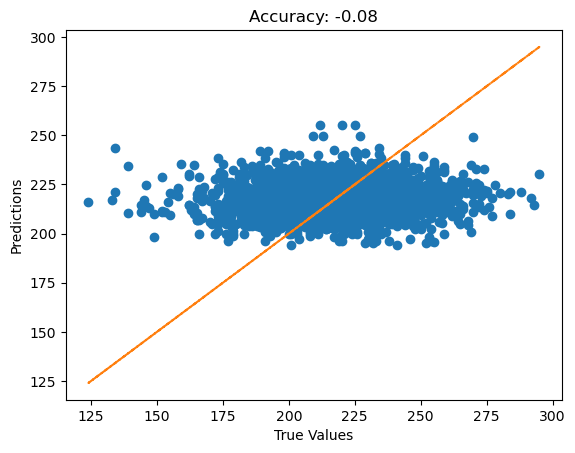

In [548]:
plt.plot(y_test, predictions, "o")
plt.plot(y_test, y_test, "--")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Accuracy: %.2f" % accuracy)
plt.show()

In [566]:
import pandas as pd
import numpy as np

# Define the home and visitor teams

home_team = input("Enter Home Team: ")  # Replace with desired home team
visitor_team = input("Enter Away Team: ")  # Replace with desired visitor team

# Create a new data instance with zeros for all one-hot columns
input_data = {col: 0 for col in X_df.columns}
input_data[f'home_{home_team}'] = 1
input_data[f'visitor_{visitor_team}'] = 1

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Apply the same MinMaxScaler used on X_df
input_scaled = MinMaxScaler().fit(X_df).transform(input_df)

# Predict total points
predicted_total_points = model.predict(input_scaled)

print("Predicted Total Points:", predicted_total_points[0])


Enter Home Team:  Toronto Raptors
Enter Away Team:  Minnesota Timberwolves


Predicted Total Points: 217.0


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
